# Natural Language Processing


## Defining Natural Language Processing

As we continue further into our content this semester, you have probably noticed that each tool takes us to a new level of being able to conduct analysis with less code. As we progress, we move toward what are called "higher level" programming tools. Python itself is a high-level programming language, meaning that it is written in a way that is easier for humans to read than computers, with lots of translation happening behind the scenes.

Tools like `pandas` remove a lot of the manual work from data processing. `numpy` and `scipy` handle much of the mathematical and statistical work that we want to do with our data. Natural Language Processing (NLP) is a tool similar to regex, but allowing us to take our text analytics to entirely new levels.

Where regex allows us to look for text-based patterns in our words or string content, we want to go further. We want to look for **meaning**-based content. How do I find content that reflects anger? What words are most common in those contexts? What about when the content reflects joy? Sadness? Regex is not enough in these cases, and so we build to an even more powerful tool.

NLP is a broad set of tools designed in order to enable users to work with text in ways that a human might work with text. When we work with text, we look for structures like sentences, and within those sentences we look for nouns to tell us who or what is the focus of the content. We look for verbs to understand what is happening. Adjectives and other descriptors help us to better understand the nuances of context. NLP models are trained to recognize these elements in text, and to be able to leverage that content to break text down and provide human users valuable information at a larger scale than would be possible if the document were simply read (slowly) by a human.

| Regex | NLP |
| --- | --- |
| Create patterns to match in text | Identify the structure of text and use that to refine information|
| Used to verify or find data | Used to analyze data |
| Applies user-defined rules | Relies heavily on ML-based (or other) models |


## What NLP can do

So what can NLP do for us?

### Identify parts of speech

When we pass a document (really a string, but typically we provide a fairly large string to an NLP algorithm) to an NLP model, it is able to identify parts of speech (nouns, verbs, etc.). This enables us to quickly break down our text to find various kinds of keywords, and is the first step in many more complex pipelines.

### Iterate over sentences

NLP can identify sentences within a document. This makes for a powerful iterative tool, as we will be able to define a processing pipeline for each sentence, and then apply that pipeline to as many sentences as exist within our document, without having to write complex code to try and recognize where each sentence starts and ends (this is MUCH harder than it sounds).

### Find words used to describe various nouns (or anything else!)

Beyond simply identifying parts of speech, NLP models can be used to build a structural dependency tree of each sentence. This structure allows us to associate adjectives with their respective nouns, or adverbs to the verb that they modify. We can explore how various entities are described in our document based on word associations. We can even visualize the structure of the sentence using simple mapping functions.

### Filter text for analysis

We can use NLP to filter our text. We can look for sentences about a specific entity, or explore other ways of filtering our text in order to create a better understanding of overall patterns in the document.

### Conduct sentiment analysis

One of the most powerful capabilities resulting from NLP models is the ability to analyze sentiment within the text. Words have the ability to convey literal meanings, as well as the more subtle capacity to convey emotion. By looking for word combinations in our text, NLP models can provide sentiment measurements at the word, sentence, or document level. This provides the ability to sort through texts for specific sentiments to learn about the way in which emotion affects the outcomes we are examining in text. One example might be looking through descriptions for negative emotions, and being able to respond to unhappy customers by flagging negative descriptions.


## Implementing NLP models

To get started with NLP models, we need to install the right libraries (and a corpus!). The library that we will use is `spacy`, although there are multiple other options available to us. One other common NLP library is `nltk`, the Natural Language Toolkit (NLTK). In my experience NLTK is more commonly employed when someone wants to create their own model from scratch, rather than implement pre-built and optimized NLP models.

In addition to a library to conduct NLP, we also rely on a **corpus**. A corpus is essentially a model of a specific language that is built to enable the actual analysis. `spacy` as a library is a general structure that can be implemented on ANY language. The corpus allows us to select a specific language, and a model of that language built on a specific set of information.

When we install `spacy`, we will also download the `en_core_web_sm` corpus. This corpus is a small-sized model of the english language, and was trained on web-based data. That means that it will perform best on data drawn from websites, and is not as strong a model for other contexts (like analyzing Pride and Prejudice). That doesn't mean that we can't use in other contexts, but it does suggest that results will not be as refined or accurate.

We need to get ourselves some text to analyze before we jump into the NLP world. In true form, here is another favorite old book. We will take a look at the first three chapters of Jane Eyre from [Project Gutenberg](https://www.gutenberg.org/browse/scores/top).

In [ ]:
import requests

jane = requests.get(
"https://github.com/dustywhite7/Econ8320/raw/master/AssignmentData/janeEyreCh1to3.txt"
).text

You can take a look at the text to get an idea of what we will be working with. Once you're ready, we will go ahead and import the `spacy` library. The very first thing we do once we import `spacy` is to load the coprus, so that we are able to use its language models to parse our document. Let's run the code, and then discuss what is happening.

In [ ]:
import spacy

nlp = spacy.load("en_core_web_sm")
doc = nlp(jane)

### The structure of a parsed document

When we create an `nlp` object based on our corpus, we are creating our pipeline for working with text. Our corpus contains all of the information necessary to prepare our data for analysis. When we create our `doc` object, we are passing our document through the processing pipeline. Our new parsed document (`doc` in this case), has some important **attributes**:

- `sents` - a generator function to iterate over each sentence in the document
- `token` - each individual element of the document
    - Elements exist at the word/punctuation level

After being processed, our document has been broken down into tokens, and then (to some extent) reconstructed into sentences. Additionally, each token is mapped out in relation to the other tokens within a sentence, and is described using various attributes to inform how that token relates to the text around it.

In [ ]:
test = [i.text.replace('\n', ' ') for i in doc.sents][:10]
# print first 10 sentences, replacing newlines with spaces

test


['CHAPTER I   There was no possibility of taking a walk that day.',
 'We had been wandering, indeed, in the leafless shrubbery an hour in the morning; but since dinner (Mrs. Reed, when there was no company, dined early) the cold winter wind had brought with it clouds so sombre, and a rain so penetrating, that further outdoor exercise was now out of the question.  ',
 'I was glad of it: I never liked long walks, especially on chilly afternoons: dreadful to me was the coming home in the raw twilight, with nipped fingers and toes, and a heart saddened by the chidings of Bessie, the nurse, and humbled by the consciousness of my physical inferiority to Eliza, John, and Georgiana Reed.  ',
 'The said Eliza, John, and Georgiana were now clustered round their mama in the drawing-room: she lay reclined on a sofa by the fireside, and with her darlings about her (for the time neither quarrelling nor crying) looked perfectly happy.',
 'Me, she had dispensed from joining the group; saying, “She reg

### Understanding tokens

Recall that each word is represented as a token in the processed document. These tokens are immensely powerful. They are the word, but also more than that. Words in the English language are often modified based on context. Verbs are conjugated, nouns may be plural, among many possibilities. Each word is **tokenized** through our corpus in order to identify the underlying word.

This is important, because we might want to look for each instance of a single word in our corpus. Let's say that we want to find every instance of "eat". If we look for "eat", we want to make sure that "eats" and "ate", as well as "eating" and other forms are all considered. This is where tokenization becomes critical. Each token contains the text value from the original document, but also the **lemmatized** word. The lemma is the base form of the word, allowing us to search for lemmas rather than the text word. This streamlines our ability to analyze text by focusing on lemmas rather than unprocessed text.

Other valuable attributes are also associated with our tokens:
- `lemma_` - the "root word" from which a token/word is derived
- `pos_` - the part of speech of a token/word
- `dep_` - the relationship of dependent tokens to the parent token (adjectives to nouns, etc.)
- `like_email`/`like_num`/`like_url` - check if a token is like an email, number, or url (unlikely in Jane Eyre)

Let's look at the first 100 non-space, non-punctuation lemmas in Jane Eyre:

In [ ]:
lemmas100 = [(i.lemma_, i.text) for i in doc if (not i.is_punct) and (not i.is_space)][:100]

print(lemmas100) # The lemma comes first, followed by the actual word in the text.

[('chapter', 'CHAPTER'), ('I', 'I'), ('there', 'There'), ('be', 'was'), ('no', 'no'), ('possibility', 'possibility'), ('of', 'of'), ('take', 'taking'), ('a', 'a'), ('walk', 'walk'), ('that', 'that'), ('day', 'day'), ('we', 'We'), ('have', 'had'), ('be', 'been'), ('wandering', 'wandering'), ('indeed', 'indeed'), ('in', 'in'), ('the', 'the'), ('leafless', 'leafless'), ('shrubbery', 'shrubbery'), ('an', 'an'), ('hour', 'hour'), ('in', 'in'), ('the', 'the'), ('morning', 'morning'), ('but', 'but'), ('since', 'since'), ('dinner', 'dinner'), ('Mrs.', 'Mrs.'), ('Reed', 'Reed'), ('when', 'when'), ('there', 'there'), ('be', 'was'), ('no', 'no'), ('company', 'company'), ('dine', 'dined'), ('early', 'early'), ('the', 'the'), ('cold', 'cold'), ('winter', 'winter'), ('wind', 'wind'), ('have', 'had'), ('bring', 'brought'), ('with', 'with'), ('it', 'it'), ('cloud', 'clouds'), ('so', 'so'), ('sombre', 'sombre'), ('and', 'and'), ('a', 'a'), ('rain', 'rain'), ('so', 'so'), ('penetrate', 'penetrating'), (

We can also filter words by part of speech using the `pos_` attribute of our tokens. Let's look for the first 100 nouns in the text.

In [ ]:
nouns = [i.text for i in doc if i.pos_=='NOUN'][:100]

print(nouns) # The lemma comes first, followed by the actual word in the text.

['CHAPTER', 'possibility', 'walk', 'day', 'leafless', 'shrubbery', 'hour', 'morning', 'dinner', 'company', 'winter', 'wind', 'clouds', 'rain', 'exercise', 'question', 'walks', 'afternoons', 'home', 'twilight', 'fingers', 'toes', 'heart', 'chidings', 'nurse', 'consciousness', 'inferiority', 'mama', 'drawing', 'room', 'sofa', 'fireside', 'darlings', 'time', 'crying', 'group', 'necessity', 'distance', 'observation', 'earnest', 'disposition', 'manner', 'franker', 'privileges', 'children', 'cavillers', 'questioners', 'child', 'elders', 'manner', 'breakfast', 'room', 'drawing', 'room', 'bookcase', 'volume', 'care', 'pictures', 'window', 'seat', 'feet', 'moreen', 'curtain', 'retirement', 'Folds', 'drapery', 'view', 'hand', 'left', 'panes', 'glass', 'day', 'intervals', 'leaves', 'book', 'aspect', 'winter', 'afternoon', 'blank', 'mist', 'cloud', 'scene', 'lawn', 'storm', 'shrub', 'rain', 'blast', 'book', 'History', 'letterpress', 'pages', 'child', 'blank', 'haunts', 'sea', 'fowl', 'rocks', 'pro

Pretty cool! If you look through that list, you'll see that there are a lot of different kinds of nouns. Two that stood out to me are "drawing" and "room"... oh wait... that's ONE NOUN that is two words! And leads us right into **noun chunks**. ;)

Sometimes, you want to be able to see a "complete" noun, and noun chunks are the tool to use!

In [ ]:
nouns = [i.text.replace('\n', ' ') for i in doc.noun_chunks][:100] # getting rid of new lines in our noun chunks

print(nouns)

['I', 'no possibility', 'a walk', 'We', 'the leafless shrubbery', 'the morning', 'dinner', 'Mrs. Reed', 'no company', 'the cold winter wind', 'it', 'clouds', 'further outdoor exercise', 'the question', 'I', 'it', 'I', 'long walks', 'chilly afternoons', 'me', 'the coming home', 'the raw twilight', 'nipped fingers', 'toes', 'a heart', 'the chidings', 'Bessie', 'the nurse', 'the consciousness', 'my physical inferiority', 'Eliza', 'John', 'Georgiana Reed', 'The', 'Eliza', 'John', 'Georgiana', 'their mama', 'the drawing-room', 'she', 'a sofa', 'the fireside', 'her darlings', 'her', 'the time', 'crying', 'Me', 'she', 'the group', 'She', 'the necessity', 'me', 'a distance', 'she', 'Bessie', 'her own observation', 'I', 'good earnest', 'a more sociable and childlike disposition', 'something', 'franker', 'it', 'she', 'me', 'privileges', 'contented, happy, little children', 'Bessie', 'I', 'I', 'Jane', 'I', 'cavillers', 'questioners', 'something', 'a child', 'her elders', 'that manner', 'you', 'A 

That's better. Noun chunks include all of the modifiers for a given noun, and make it easier to build a more complete understanding of the references being made. Why do we care? Because "the red moreen curtain" is the object, and we want to be sure to understand the implication of the full object, rather than only the word within the noun chunk that is actually a noun.

If we want to understand more about the nature of the relationships between words within a sentence, we can plot a dependency tree.

**NOTE: When you run the following code, be sure to click the STOP button when you're done, or no other code will run! The renderer for the dependency tree will keep running until you terminate it!**

In [ ]:
from spacy import displacy

sent = [i for i in doc.sents][100]
displacy.serve(sent, style="dep")

/home/codio/miniconda3/lib/python3.9/site-packages/spacy/displacy/__init__.py:103: UserWarning: [W011] It looks like you're calling displacy.serve from within a Jupyter notebook or a similar environment. This likely means you're already running a local web server, so there's no need to make displaCy start another one. Instead, you should be able to replace displacy.serve with displacy.render to show the visualization.
  warnings.warn(Warnings.W011)



Using the 'dep' visualizer
Serving on http://0.0.0.0:5000 ...

Shutting down server on port 5000.


Using this mapping, we can see each of the clauses of the sentence, and how words within the sentence relate to one another. The mapping can help us to understand whether or not we have correctly identified parts of speech that are associated with the topics we are trying to uncover in our code.


## Sentiment Analysis

My personal favorite part of NLP, sentiment analysis is a very powerful instrument for understanding text and creating actionable items. Many firms use sentiment analysis in combination with their social media accounts to measure engagement and understand how successful marketing campaigns or other interactions are with target audiences.

In order to conduct sentiment analysis using spacy, we are going to use a library called `spacytextblob`. This library includes supplemental material that expands the english corpus' ability to process our data. When utilized, `spacytextblob` is going to add sentiment analysis models to the general pipeline created through `spacy`.

We can incorporate the `SpacyTextBlob` process into our pipeline like this:

In [ ]:
import spacy
from spacytextblob.spacytextblob import SpacyTextBlob
import requests

jane = requests.get(
"https://github.com/dustywhite7/Econ8320/raw/master/AssignmentData/janeEyreCh1to3.txt"
).text

nlp = spacy.load('en_core_web_sm')
nlp.add_pipe('spacytextblob')

blob = nlp(jane)

sents = [i for i in blob.sents]

for sentence in sents[:10]:
    print("Polarity: {0:3.2f}, Subjectivity: {1:3.2f}".format(sentence._.polarity, sentence._.subjectivity))

Polarity: 0.00, Subjectivity: 0.00
Polarity: -0.17, Subjectivity: 0.60
Polarity: -0.30, Subjectivity: 0.69
Polarity: 0.13, Subjectivity: 0.67
Polarity: 0.41, Subjectivity: 0.66
Polarity: 0.00, Subjectivity: 0.00
Polarity: 0.37, Subjectivity: 0.53
Polarity: 0.00, Subjectivity: 0.00
Polarity: 0.00, Subjectivity: 0.00
Polarity: 0.03, Subjectivity: 0.13


We can add code to our processing pipeline using the `nlp.add_pipe()` method on our `nlp` object. In this case, we are adding the sentiment analysis information created through `SpacyTextBlob`, but this can be literally anything. We can create any kind of function that we want to implement on our code, and can add that functionality to our pipeline in the same way. More examples are available in the `spacy` [documentation](https://spacy.io/usage/processing-pipelines#pipelines).

If you want to get more in-depth with NLP, I highly recommend that you explore the course material available through `spacy`'s own NLP curriculum (freely available!): https://course.spacy.io/en/

## Solve it!

In this project, you will use the text from [chapters 44 and 45](https://github.com/dustywhite7/Econ8320/raw/refs/heads/master/AssignmentData/prideAndPrejudiceChapters.txt) of *Pride and Prejudice*. Please find the following information:

- The number of sentences (store as `int` in a variable named `sentences`)
- A list of all proper nouns used across the two chapters (stored as strings in the `names` variable)
- A DataFrame containing a count of the top 20 adjectives used in the text (stored in the `adjectives` variable)
    - Be sure to make all words lower case ONLY!
- A bar chart of the top 20 adjectives used in the text stored in a variable called `fig`


Place all of your code in the cell below, labeled `#si-exercise`.

<ipython-input-6-af1bd7fd528e>:426: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(adjectives_df["Adjective"], rotation=45)


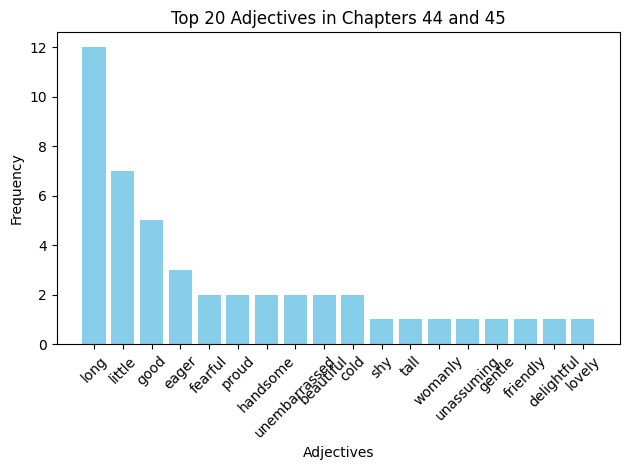

In [6]:
#si-exercise
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
import re

# Load the text from Chapters 44 and 45
text = """[Chapter 44


Elizabeth had settled it that Mr. Darcy would bring his sister to visit
her the very day after her reaching Pemberley; and was consequently
resolved not to be out of sight of the inn the whole of that morning.
But her conclusion was false; for on the very morning after their
arrival at Lambton, these visitors came. They had been walking about the
place with some of their new friends, and were just returning to the inn
to dress themselves for dining with the same family, when the sound of a
carriage drew them to a window, and they saw a gentleman and a lady in
a curricle driving up the street. Elizabeth immediately recognizing
the livery, guessed what it meant, and imparted no small degree of her
surprise to her relations by acquainting them with the honour which she
expected. Her uncle and aunt were all amazement; and the embarrassment
of her manner as she spoke, joined to the circumstance itself, and many
of the circumstances of the preceding day, opened to them a new idea on
the business. Nothing had ever suggested it before, but they felt that
there was no other way of accounting for such attentions from such a
quarter than by supposing a partiality for their niece. While these
newly-born notions were passing in their heads, the perturbation of
Elizabeth's feelings was at every moment increasing. She was quite
amazed at her own discomposure; but amongst other causes of disquiet,
she dreaded lest the partiality of the brother should have said too much
in her favour; and, more than commonly anxious to please, she naturally
suspected that every power of pleasing would fail her.

She retreated from the window, fearful of being seen; and as she walked
up and down the room, endeavouring to compose herself, saw such looks of
inquiring surprise in her uncle and aunt as made everything worse.

Miss Darcy and her brother appeared, and this formidable introduction
took place. With astonishment did Elizabeth see that her new
acquaintance was at least as much embarrassed as herself. Since her
being at Lambton, she had heard that Miss Darcy was exceedingly proud;
but the observation of a very few minutes convinced her that she was
only exceedingly shy. She found it difficult to obtain even a word from
her beyond a monosyllable.

Miss Darcy was tall, and on a larger scale than Elizabeth; and, though
little more than sixteen, her figure was formed, and her appearance
womanly and graceful. She was less handsome than her brother; but there
was sense and good humour in her face, and her manners were perfectly
unassuming and gentle. Elizabeth, who had expected to find in her as
acute and unembarrassed an observer as ever Mr. Darcy had been, was much
relieved by discerning such different feelings.

They had not long been together before Mr. Darcy told her that Bingley
was also coming to wait on her; and she had barely time to express her
satisfaction, and prepare for such a visitor, when Bingley's quick
step was heard on the stairs, and in a moment he entered the room. All
Elizabeth's anger against him had been long done away; but had she still
felt any, it could hardly have stood its ground against the unaffected
cordiality with which he expressed himself on seeing her again. He
inquired in a friendly, though general way, after her family, and looked
and spoke with the same good-humoured ease that he had ever done.

To Mr. and Mrs. Gardiner he was scarcely a less interesting personage
than to herself. They had long wished to see him. The whole party before
them, indeed, excited a lively attention. The suspicions which had just
arisen of Mr. Darcy and their niece directed their observation towards
each with an earnest though guarded inquiry; and they soon drew from
those inquiries the full conviction that one of them at least knew
what it was to love. Of the lady's sensations they remained a little
in doubt; but that the gentleman was overflowing with admiration was
evident enough.

Elizabeth, on her side, had much to do. She wanted to ascertain the
feelings of each of her visitors; she wanted to compose her own, and
to make herself agreeable to all; and in the latter object, where she
feared most to fail, she was most sure of success, for those to whom she
endeavoured to give pleasure were prepossessed in her favour. Bingley
was ready, Georgiana was eager, and Darcy determined, to be pleased.

In seeing Bingley, her thoughts naturally flew to her sister; and, oh!
how ardently did she long to know whether any of his were directed in
a like manner. Sometimes she could fancy that he talked less than on
former occasions, and once or twice pleased herself with the notion
that, as he looked at her, he was trying to trace a resemblance. But,
though this might be imaginary, she could not be deceived as to his
behaviour to Miss Darcy, who had been set up as a rival to Jane. No look
appeared on either side that spoke particular regard. Nothing occurred
between them that could justify the hopes of his sister. On this point
she was soon satisfied; and two or three little circumstances occurred
ere they parted, which, in her anxious interpretation, denoted a
recollection of Jane not untinctured by tenderness, and a wish of saying
more that might lead to the mention of her, had he dared. He observed
to her, at a moment when the others were talking together, and in a tone
which had something of real regret, that it “was a very long time since
he had had the pleasure of seeing her;” and, before she could reply,
he added, “It is above eight months. We have not met since the 26th of
November, when we were all dancing together at Netherfield.”

Elizabeth was pleased to find his memory so exact; and he afterwards
took occasion to ask her, when unattended to by any of the rest, whether
_all_ her sisters were at Longbourn. There was not much in the question,
nor in the preceding remark; but there was a look and a manner which
gave them meaning.

It was not often that she could turn her eyes on Mr. Darcy himself;
but, whenever she did catch a glimpse, she saw an expression of general
complaisance, and in all that he said she heard an accent so removed
from _hauteur_ or disdain of his companions, as convinced her that
the improvement of manners which she had yesterday witnessed however
temporary its existence might prove, had at least outlived one day. When
she saw him thus seeking the acquaintance and courting the good opinion
of people with whom any intercourse a few months ago would have been a
disgrace--when she saw him thus civil, not only to herself, but to the
very relations whom he had openly disdained, and recollected their last
lively scene in Hunsford Parsonage--the difference, the change was
so great, and struck so forcibly on her mind, that she could hardly
restrain her astonishment from being visible. Never, even in the company
of his dear friends at Netherfield, or his dignified relations
at Rosings, had she seen him so desirous to please, so free from
self-consequence or unbending reserve, as now, when no importance
could result from the success of his endeavours, and when even the
acquaintance of those to whom his attentions were addressed would draw
down the ridicule and censure of the ladies both of Netherfield and
Rosings.

Their visitors stayed with them above half-an-hour; and when they arose
to depart, Mr. Darcy called on his sister to join him in expressing
their wish of seeing Mr. and Mrs. Gardiner, and Miss Bennet, to dinner
at Pemberley, before they left the country. Miss Darcy, though with a
diffidence which marked her little in the habit of giving invitations,
readily obeyed. Mrs. Gardiner looked at her niece, desirous of knowing
how _she_, whom the invitation most concerned, felt disposed as to its
acceptance, but Elizabeth had turned away her head. Presuming however,
that this studied avoidance spoke rather a momentary embarrassment than
any dislike of the proposal, and seeing in her husband, who was fond of
society, a perfect willingness to accept it, she ventured to engage for
her attendance, and the day after the next was fixed on.

Bingley expressed great pleasure in the certainty of seeing Elizabeth
again, having still a great deal to say to her, and many inquiries to
make after all their Hertfordshire friends. Elizabeth, construing all
this into a wish of hearing her speak of her sister, was pleased, and on
this account, as well as some others, found herself, when their
visitors left them, capable of considering the last half-hour with some
satisfaction, though while it was passing, the enjoyment of it had been
little. Eager to be alone, and fearful of inquiries or hints from her
uncle and aunt, she stayed with them only long enough to hear their
favourable opinion of Bingley, and then hurried away to dress.

But she had no reason to fear Mr. and Mrs. Gardiner's curiosity; it was
not their wish to force her communication. It was evident that she was
much better acquainted with Mr. Darcy than they had before any idea of;
it was evident that he was very much in love with her. They saw much to
interest, but nothing to justify inquiry.

Of Mr. Darcy it was now a matter of anxiety to think well; and, as far
as their acquaintance reached, there was no fault to find. They could
not be untouched by his politeness; and had they drawn his character
from their own feelings and his servant's report, without any reference
to any other account, the circle in Hertfordshire to which he was known
would not have recognized it for Mr. Darcy. There was now an interest,
however, in believing the housekeeper; and they soon became sensible
that the authority of a servant who had known him since he was four
years old, and whose own manners indicated respectability, was not to be
hastily rejected. Neither had anything occurred in the intelligence of
their Lambton friends that could materially lessen its weight. They had
nothing to accuse him of but pride; pride he probably had, and if not,
it would certainly be imputed by the inhabitants of a small market-town
where the family did not visit. It was acknowledged, however, that he
was a liberal man, and did much good among the poor.

With respect to Wickham, the travellers soon found that he was not held
there in much estimation; for though the chief of his concerns with the
son of his patron were imperfectly understood, it was yet a well-known
fact that, on his quitting Derbyshire, he had left many debts behind
him, which Mr. Darcy afterwards discharged.

As for Elizabeth, her thoughts were at Pemberley this evening more than
the last; and the evening, though as it passed it seemed long, was not
long enough to determine her feelings towards _one_ in that mansion;
and she lay awake two whole hours endeavouring to make them out. She
certainly did not hate him. No; hatred had vanished long ago, and she
had almost as long been ashamed of ever feeling a dislike against him,
that could be so called. The respect created by the conviction of his
valuable qualities, though at first unwillingly admitted, had for some
time ceased to be repugnant to her feeling; and it was now heightened
into somewhat of a friendlier nature, by the testimony so highly in
his favour, and bringing forward his disposition in so amiable a light,
which yesterday had produced. But above all, above respect and esteem,
there was a motive within her of goodwill which could not be overlooked.
It was gratitude; gratitude, not merely for having once loved her,
but for loving her still well enough to forgive all the petulance and
acrimony of her manner in rejecting him, and all the unjust accusations
accompanying her rejection. He who, she had been persuaded, would avoid
her as his greatest enemy, seemed, on this accidental meeting, most
eager to preserve the acquaintance, and without any indelicate display
of regard, or any peculiarity of manner, where their two selves only
were concerned, was soliciting the good opinion of her friends, and bent
on making her known to his sister. Such a change in a man of so much
pride exciting not only astonishment but gratitude--for to love, ardent
love, it must be attributed; and as such its impression on her was of a
sort to be encouraged, as by no means unpleasing, though it could not be
exactly defined. She respected, she esteemed, she was grateful to him,
she felt a real interest in his welfare; and she only wanted to know how
far she wished that welfare to depend upon herself, and how far it would
be for the happiness of both that she should employ the power, which her
fancy told her she still possessed, of bringing on her the renewal of
his addresses.

It had been settled in the evening between the aunt and the niece, that
such a striking civility as Miss Darcy's in coming to see them on the
very day of her arrival at Pemberley, for she had reached it only to a
late breakfast, ought to be imitated, though it could not be equalled,
by some exertion of politeness on their side; and, consequently, that
it would be highly expedient to wait on her at Pemberley the following
morning. They were, therefore, to go. Elizabeth was pleased; though when
she asked herself the reason, she had very little to say in reply.

Mr. Gardiner left them soon after breakfast. The fishing scheme had been
renewed the day before, and a positive engagement made of his meeting
some of the gentlemen at Pemberley before noon.



Chapter 45


Convinced as Elizabeth now was that Miss Bingley's dislike of her had
originated in jealousy, she could not help feeling how unwelcome her
appearance at Pemberley must be to her, and was curious to know with how
much civility on that lady's side the acquaintance would now be renewed.

On reaching the house, they were shown through the hall into the saloon,
whose northern aspect rendered it delightful for summer. Its windows
opening to the ground, admitted a most refreshing view of the high woody
hills behind the house, and of the beautiful oaks and Spanish chestnuts
which were scattered over the intermediate lawn.

In this house they were received by Miss Darcy, who was sitting there
with Mrs. Hurst and Miss Bingley, and the lady with whom she lived in
London. Georgiana's reception of them was very civil, but attended with
all the embarrassment which, though proceeding from shyness and the fear
of doing wrong, would easily give to those who felt themselves inferior
the belief of her being proud and reserved. Mrs. Gardiner and her niece,
however, did her justice, and pitied her.

By Mrs. Hurst and Miss Bingley they were noticed only by a curtsey; and,
on their being seated, a pause, awkward as such pauses must always be,
succeeded for a few moments. It was first broken by Mrs. Annesley, a
genteel, agreeable-looking woman, whose endeavour to introduce some kind
of discourse proved her to be more truly well-bred than either of the
others; and between her and Mrs. Gardiner, with occasional help from
Elizabeth, the conversation was carried on. Miss Darcy looked as if she
wished for courage enough to join in it; and sometimes did venture a
short sentence when there was least danger of its being heard.

Elizabeth soon saw that she was herself closely watched by Miss Bingley,
and that she could not speak a word, especially to Miss Darcy, without
calling her attention. This observation would not have prevented her
from trying to talk to the latter, had they not been seated at an
inconvenient distance; but she was not sorry to be spared the necessity
of saying much. Her own thoughts were employing her. She expected every
moment that some of the gentlemen would enter the room. She wished, she
feared that the master of the house might be amongst them; and whether
she wished or feared it most, she could scarcely determine. After
sitting in this manner a quarter of an hour without hearing Miss
Bingley's voice, Elizabeth was roused by receiving from her a cold
inquiry after the health of her family. She answered with equal
indifference and brevity, and the other said no more.

The next variation which their visit afforded was produced by the
entrance of servants with cold meat, cake, and a variety of all the
finest fruits in season; but this did not take place till after many
a significant look and smile from Mrs. Annesley to Miss Darcy had been
given, to remind her of her post. There was now employment for the whole
party--for though they could not all talk, they could all eat; and the
beautiful pyramids of grapes, nectarines, and peaches soon collected
them round the table.

While thus engaged, Elizabeth had a fair opportunity of deciding whether
she most feared or wished for the appearance of Mr. Darcy, by the
feelings which prevailed on his entering the room; and then, though but
a moment before she had believed her wishes to predominate, she began to
regret that he came.

He had been some time with Mr. Gardiner, who, with two or three other
gentlemen from the house, was engaged by the river, and had left him
only on learning that the ladies of the family intended a visit to
Georgiana that morning. No sooner did he appear than Elizabeth wisely
resolved to be perfectly easy and unembarrassed; a resolution the more
necessary to be made, but perhaps not the more easily kept, because she
saw that the suspicions of the whole party were awakened against them,
and that there was scarcely an eye which did not watch his behaviour
when he first came into the room. In no countenance was attentive
curiosity so strongly marked as in Miss Bingley's, in spite of the
smiles which overspread her face whenever she spoke to one of its
objects; for jealousy had not yet made her desperate, and her attentions
to Mr. Darcy were by no means over. Miss Darcy, on her brother's
entrance, exerted herself much more to talk, and Elizabeth saw that he
was anxious for his sister and herself to get acquainted, and forwarded
as much as possible, every attempt at conversation on either side. Miss
Bingley saw all this likewise; and, in the imprudence of anger, took the
first opportunity of saying, with sneering civility:

“Pray, Miss Eliza, are not the ----shire Militia removed from Meryton?
They must be a great loss to _your_ family.”

In Darcy's presence she dared not mention Wickham's name; but Elizabeth
instantly comprehended that he was uppermost in her thoughts; and the
various recollections connected with him gave her a moment's distress;
but exerting herself vigorously to repel the ill-natured attack, she
presently answered the question in a tolerably detached tone. While
she spoke, an involuntary glance showed her Darcy, with a heightened
complexion, earnestly looking at her, and his sister overcome with
confusion, and unable to lift up her eyes. Had Miss Bingley known what
pain she was then giving her beloved friend, she undoubtedly would
have refrained from the hint; but she had merely intended to discompose
Elizabeth by bringing forward the idea of a man to whom she believed
her partial, to make her betray a sensibility which might injure her in
Darcy's opinion, and, perhaps, to remind the latter of all the follies
and absurdities by which some part of her family were connected
with that corps. Not a syllable had ever reached her of Miss Darcy's
meditated elopement. To no creature had it been revealed, where secrecy
was possible, except to Elizabeth; and from all Bingley's connections
her brother was particularly anxious to conceal it, from the very
wish which Elizabeth had long ago attributed to him, of their becoming
hereafter her own. He had certainly formed such a plan, and without
meaning that it should affect his endeavour to separate him from Miss
Bennet, it is probable that it might add something to his lively concern
for the welfare of his friend.

Elizabeth's collected behaviour, however, soon quieted his emotion; and
as Miss Bingley, vexed and disappointed, dared not approach nearer to
Wickham, Georgiana also recovered in time, though not enough to be able
to speak any more. Her brother, whose eye she feared to meet, scarcely
recollected her interest in the affair, and the very circumstance which
had been designed to turn his thoughts from Elizabeth seemed to have
fixed them on her more and more cheerfully.

Their visit did not continue long after the question and answer above
mentioned; and while Mr. Darcy was attending them to their carriage Miss
Bingley was venting her feelings in criticisms on Elizabeth's person,
behaviour, and dress. But Georgiana would not join her. Her brother's
recommendation was enough to ensure her favour; his judgement could not
err. And he had spoken in such terms of Elizabeth as to leave Georgiana
without the power of finding her otherwise than lovely and amiable. When
Darcy returned to the saloon, Miss Bingley could not help repeating to
him some part of what she had been saying to his sister.

“How very ill Miss Eliza Bennet looks this morning, Mr. Darcy,” she
cried; “I never in my life saw anyone so much altered as she is since
the winter. She is grown so brown and coarse! Louisa and I were agreeing
that we should not have known her again.”

However little Mr. Darcy might have liked such an address, he contented
himself with coolly replying that he perceived no other alteration than
her being rather tanned, no miraculous consequence of travelling in the
summer.

“For my own part,” she rejoined, “I must confess that I never could
see any beauty in her. Her face is too thin; her complexion has no
brilliancy; and her features are not at all handsome. Her nose
wants character--there is nothing marked in its lines. Her teeth are
tolerable, but not out of the common way; and as for her eyes,
which have sometimes been called so fine, I could never see anything
extraordinary in them. They have a sharp, shrewish look, which I do
not like at all; and in her air altogether there is a self-sufficiency
without fashion, which is intolerable.”

Persuaded as Miss Bingley was that Darcy admired Elizabeth, this was not
the best method of recommending herself; but angry people are not always
wise; and in seeing him at last look somewhat nettled, she had all the
success she expected. He was resolutely silent, however, and, from a
determination of making him speak, she continued:

“I remember, when we first knew her in Hertfordshire, how amazed we all
were to find that she was a reputed beauty; and I particularly recollect
your saying one night, after they had been dining at Netherfield, '_She_
a beauty!--I should as soon call her mother a wit.' But afterwards she
seemed to improve on you, and I believe you thought her rather pretty at
one time.”

“Yes,” replied Darcy, who could contain himself no longer, “but _that_
was only when I first saw her, for it is many months since I have
considered her as one of the handsomest women of my acquaintance.”

He then went away, and Miss Bingley was left to all the satisfaction of
having forced him to say what gave no one any pain but herself.

Mrs. Gardiner and Elizabeth talked of all that had occurred during their
visit, as they returned, except what had particularly interested them
both. The look and behaviour of everybody they had seen were discussed,
except of the person who had mostly engaged their attention. They talked
of his sister, his friends, his house, his fruit--of everything but
himself; yet Elizabeth was longing to know what Mrs. Gardiner thought of
him, and Mrs. Gardiner would have been highly gratified by her niece's
beginning the subject.]"""

# 1. Count the number of sentences
sentences = len(re.split(r'[.!?]', text))

# 2. Find all proper nouns
# Tokenize and use regex to detect proper nouns (words starting with a capital letter, not at the beginning of a sentence)
tokens = re.findall(r'\b[A-Z][a-z]*\b', text)
names = list(set(word.lower() for word in tokens if word.lower() not in ['I', 'Mr', 'Mrs', 'Miss', 'It']))

# 3. Count the top 20 adjectives
# Define a list of common adjectives to help with identification
adjectives_list = ["beautiful", "cold", "delightful", "eager", "fearful", "friendly", "gentle", "good", "handsome",
                   "large", "little", "long", "lovely", "proud", "shy", "tall", "unassuming", "unembarrassed", "warm", "womanly"]
word_tokens = re.findall(r'\b\w+\b', text.lower())
adjectives = [word for word in word_tokens if word in adjectives_list]
adjective_counts = Counter(adjectives).most_common(20)

# Create a DataFrame
adjectives_df = pd.DataFrame(adjective_counts, columns=["Adjective", "Count"])

# 4. Create a bar chart
fig, ax = plt.subplots()
ax.bar(adjectives_df["Adjective"], adjectives_df["Count"], color='skyblue')
ax.set_title("Top 20 Adjectives in Chapters 44 and 45")
ax.set_xlabel("Adjectives")
ax.set_ylabel("Frequency")
ax.set_xticklabels(adjectives_df["Adjective"], rotation=45)
plt.tight_layout()

# Store DataFrame and chart in variables
adjectives = adjectives_df
fig = fig
